# 데이터 전처리 (데이터 인코딩)

## 데이터 전처리
ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력하느냐에 따라 결과도 크게 달라짐
  
**기본 데이터 전처리 사항**
- 결손값 / 문자열 값 처리
- 이상치 제거
- 피처 선택
  
**데이터 인코딩**
- 레이블 인코딩
- 원-핫 인코딩
  
**피처 스케일링**
- StandardScaler
- MinMaxScaler

## 사이킷런 ML 알고리즘의 데이터 기본 조건  
- 모든 데이터는 숫자형 (정수, 실수) 여야 함 문자열 안됨  
- 데이터에 빈 값이 없어야 함 (Null 안됨)
  
## 사이킷런의 ML 알고리즘 적용 전 기본 처리 사항
### 결손값 처리
- NAN, Null 값 허용 안 됨
- NaN, Null 값을 고정값으로 변환
- 평균값 대체, 해당 피처 제외 등
- 주의 : Null값 잘못 처리 시 예측 왜곡 심각
  
### 문자열 값 처리
- 문자열 값을 입력 값으로 허용하지 않음
- 인코딩 처리하여 숫자형으로 변환
- 카테고리형 피처는 코드값으로 표현
- 텍스트 피처는 피처 벡터화 기법으로 벡터화 (텍스트 분석 시 별도 설명)
- 불필요한 피처는 삭제 처리
- 예) 주민번호, 단순 문자열 아이디 등 : 단순히 데이터 행 식별하는 용도로 사용될 뿐 예측하려는 요소가 될 수 없고  
  오히려 알고리즘을 복잡하게 만들어서 예측 성능을 떨어지게 한다.

> **참고**  
피처 벡터화 : 텍스트를 숫자형 벡터 값으로 변환하는 것

### 피처 선택 / 추출 / 가공
- 피처가 많을 때 어떤 피처를 선택할 것인가
- 우수한 특정 피처만 선택해서 처리하는 것이 좋을 때가 있음

### 머신러닝의 대표적인 인코딩 방식
- 레이블 인코딩 (Lable Encoding)
- 원-핫 인코딩 (Ont-Hot Encoding)

___
# 레이블 인코딩
문자열 카테고리 값을 숫자형 카테고리 값으로 변환  
  
예) 상품 데이터  
- 상품 구분 : TV, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서
- 숫자로 변환 : TV->1, 냉장고->2, 전자레인지->3 등
  
주의! 01, 02는 문자열이므로 1, 2로 적어야 함

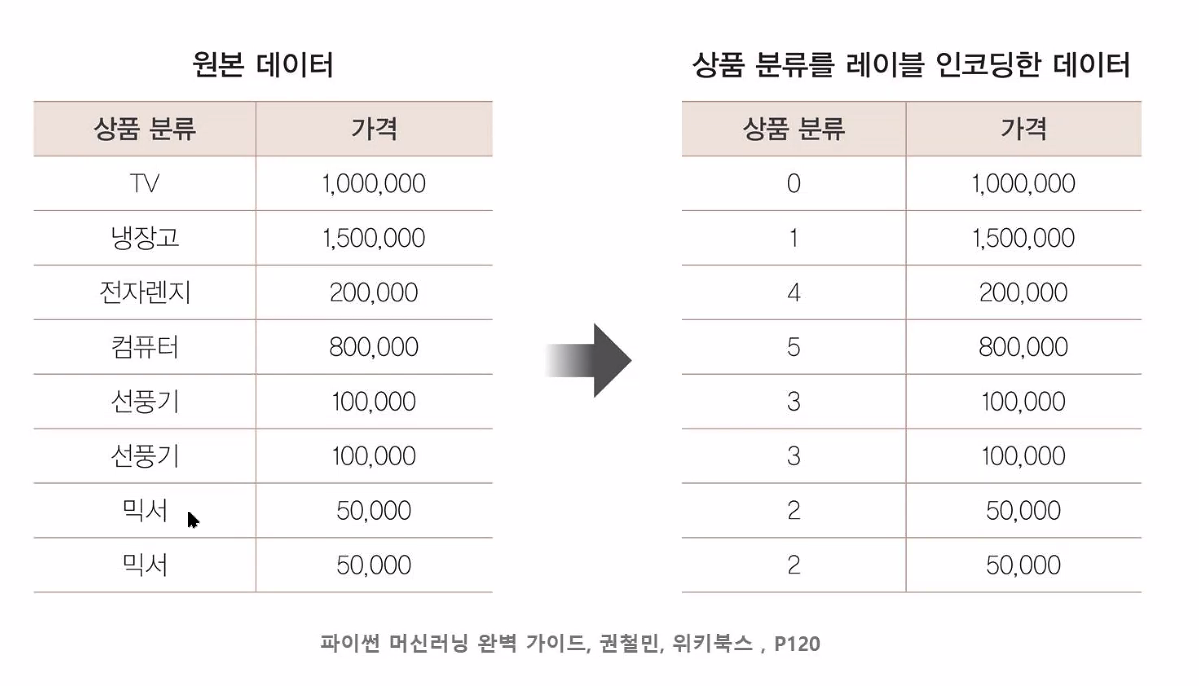

## 레이블 인코딩 예제

In [2]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder 객체 생성한 후 fit()과 transfrom()메서드로 label 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('인코딩 변환값 :', labels)

인코딩 변환값 : [0 1 4 5 3 3 2 2]


In [3]:
# 인코딩 전 원래 값 확인 : classes_ 속성
print('인코딩 클래스 :', encoder.classes_)

인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [4]:
# 인코딩 된 값 디코딩 하기 : inverse_transform()
# 어떤 순서로 디코딩 하냐에 따라 원본 값 순서가 달라짐
print('디코딩 원본 값 : ', encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))
print('디코딩 원본 값 : ', encoder.inverse_transform([4, 5, 2, 0, 3, 3, 1, 2]))

디코딩 원본 값 :  ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']
디코딩 원본 값 :  ['전자레인지' '컴퓨터' '믹서' 'TV' '선풍기' '선풍기' '냉장고' '믹서']


## 레이블 인코딩 방식 주의 사항
간단하게 문자열 값을 숫자형 값으로 변환하지만 이는 단순 코드일 뿐 크기와는 상관 없음  
일부 ML 알고리즘에서 이를 적용할 경우 예측 성능이 떨어지는 경우 발생  
숫자 값의 크기 특성이 작용하기 때문  
즉, 냉장고가 1 믹서가 2로 변환되면 1보다 2가 더 큰 값이므로 가중치가 부여되거나 더 중요하게 인식될 가능성이 발생함  
이런 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에서는 적용하지 않음  
트리 계ㅕㄹ의 ML알고리즘은 숫자의 이런 특성을 반영하지 않기 때문에 레이블 인코딩 적용할 때 문제 없음  

___
# 원-핫 인코딩 (One-Hot Encoding)
행 형태의 피처값을 열 형태로 변환한 뒤 피처값 인덱스에 해당하는 컬럼에는 1로 표시하고  
나머지 칼럼에는 0으로 표시하는 방식  
사이킷런에서 원-핫 인코딩 : OneHotEncoder 클래스로 쉽게 변환

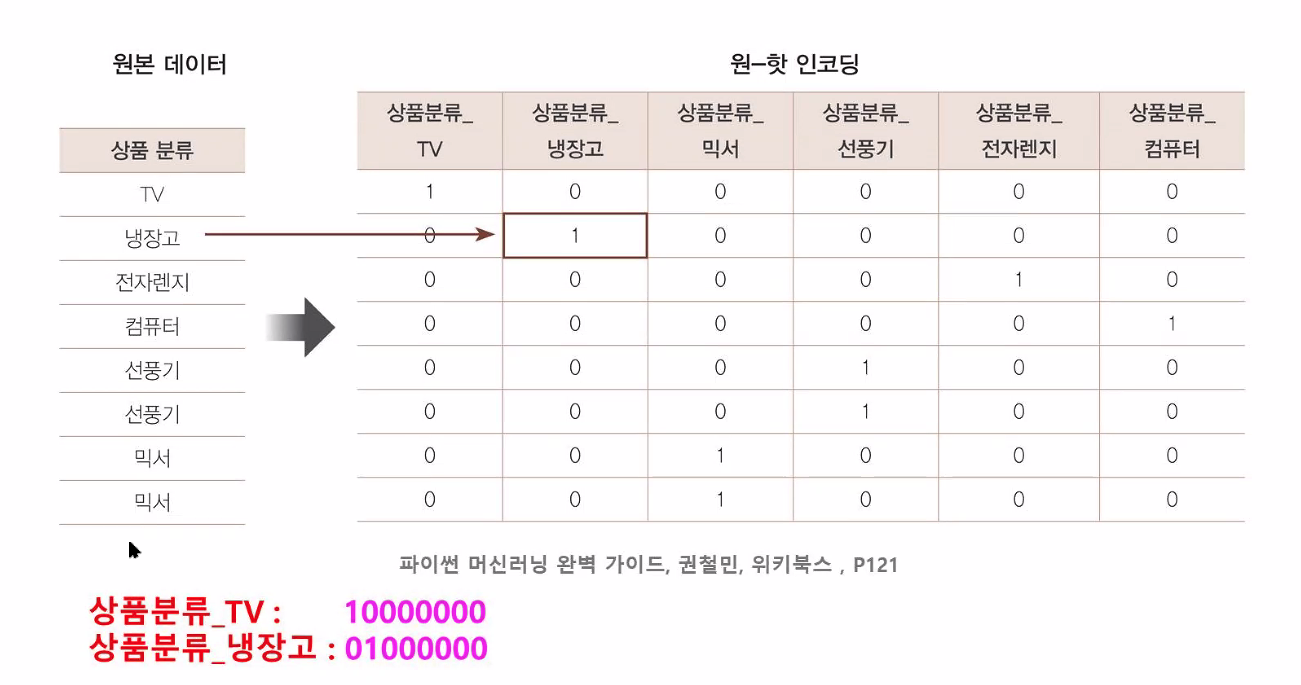

## 원-핫 인코딩 과정
1. 문자열 값을 숫자형 값으로 변환 (레이블 인코딩 사용)
2. 입력값을 2차원 데이터로 변환
3. OneHotEncoder 클래스로 원-핫 인코딩 적용
    - fit()
    - trnasform()

## 원-핫 인코딩 예제

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 1) 문자열 값을 숫자형 값으로 변환 (레이블 인코딩 사용)
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [6]:
# 2) 입력 값을 2차원 데이터로 변환
labels = labels.reshape(-1, 1) # 컬럼수 1로 고정 행은 자동으로 구성 (-1)
labels

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [7]:
# 3) OneHotEncoder 클래스로 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
oh_labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [9]:
# 2차원 형태로 출력
print('원-핫 인코딩 데이터 차원 :', oh_labels.shape)  # 8행 6열
print('원-핫 인코딩 데이터\n', oh_labels.toarray())

원-핫 인코딩 데이터 차원 : (8, 6)
원-핫 인코딩 데이터
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [16]:
print(oh_labels)
# 1값 위치 출력
# (2, 4) : 2행 4열의 위치에 1 값이 있다

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


## 원-핫 인코딩 전체 과정

In [18]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 1) 문자열 값을 숫자형 값으로 변환 (레이블 인코딩 사용)
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2) 입력 값을 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# 3) OneHotEncoder 클래스로 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터 :\n', oh_labels.toarray(), '\n')
print('원-핫 인코딩 데이터 차원 :', oh_labels.shape)

원-핫 인코딩 데이터 :
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]] 

원-핫 인코딩 데이터 차원 : (8, 6)


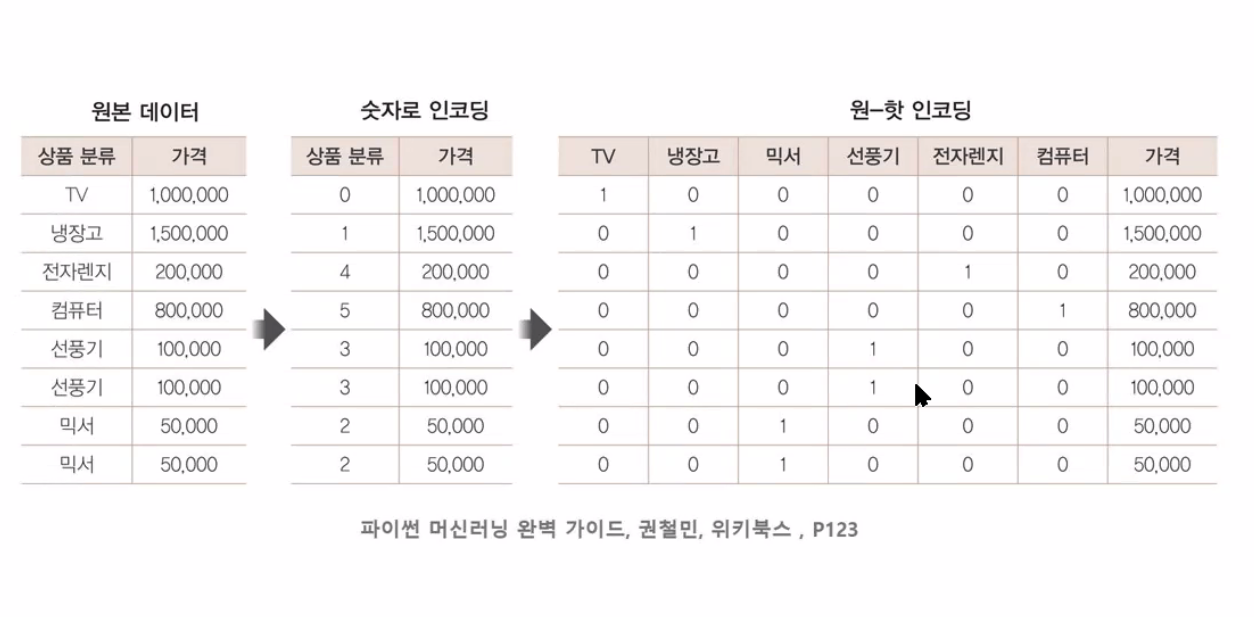

## Pandas API 사용해서 원-핫 인코딩 수행
get_dummies() 사용하면 숫자 변환 과정을 거치지 않고 바로 원-핫 인코딩 변환 가능!

In [21]:
import pandas as pd
df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [22]:
# 숫자 변환 과정을 거치지 않고 바로 원-핫 인코딩 변환 가능
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [23]:
# Pandas 데이터 프레임을 Numpy 배열로 변환
pd.get_dummies(df).to_numpy()

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

___
# 피처 스케일링과 정규화

**피처 스케일링(Feature Scaling)**  
서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업(표준화, 정규화 등)  
  
**표준화(Standardization)**  
데이터 피처의 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환  
  
**정규화(Normalization)**  
서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 (즉, 개별 데이터 크기를 모두 똑같은 단위로 변경)

## 표준화 (Standardization)
데이터 피처 각 평균이 0이고 분산이 1인 가우시안 정규 분포 (표준 정규 분포)를 가지는 값으로 변환하는 것   
  
참고 : 사전에 표준화를 적용해야 하는 알고리즘  
선형회귀, 로지스틱 회귀, RBF 커널을 이용하는 서포트 벡터 머신  
이들 알고리즘은 데이터가 가우시안 정규 분포 (표준 정규 분포)를 가지고 있다고 가정하고 구현함  
사전에 표준화를 적용 함으로써 예측 성능을 향상시킬 수 있음  

## 정규화 (Nomalization)
서로 다른 피처의 크기를 통일하기 위해 크기를 변환해 주는 것  
  
예를들어  
피처 A : 거리를 나타내는 나타내는 변수 값 범위가 0 ~ 100km  
피처 B : 금액을 나타내는 변수 값 범위가 0 ~ 100,000,000,000원  
동일한 크기 단위로 비교하기 위해 최소~최대 범위를 0 ~ 1로 변환

그럼 이제 사이킷런에서 제공하는 대표적인 피처 스케일링 클래스에 대해 알아보자
- StandardScaler
- MinMaxScaler

___
# StandardScaler 

## StandardScaler 사용 예제

In [11]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 로드하고 데이터 프레임으로 변환

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
# iris_df

print('피처들의 평균 값 :\n', iris_df.mean(), '\n')
print('피처들의 분산 값 :\n', iris_df.var())

피처들의 평균 값 :
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64 

피처들의 분산 값 :
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


## StandardScaler 이용 표준화해서 변환
1. StandardScaler 객체 생성
2. fit() : 데이터 변환을 위한 기준 정보 설정
3. transform() : fit() 에서 설정된 정보를 이용해서 데이터 변환  
  
scale 변환된 데이터 세트는 numpy ndarray로 반환됨

In [12]:
# StandardScaler 이용 표준화해서 변환
from sklearn.preprocessing import StandardScaler

# 1) StandardScaler 객체 생성
scaler = StandardScaler()

# 2)3) 데이터 셋 변환 : fit()/transform()사용
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) # numpy ndarray 반환

# numpy ndarray를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

print('피처들의 평균 값 :\n', iris_df_scaled.mean(), '\n')
print('피처들의 분산 값 :\n', iris_df_scaled.var())

피처들의 평균 값 :
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64 

피처들의 분산 값 :
 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 결과  
모든 컬럼 값의 평균이 0에 아주 가까운 값으로 변환됨  
분산은 1에 아주 가까운 값으로 변환  

In [31]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


___
# MinMaxScaler
- 데이터값을 0과 1사이의 범위 값으로 변환
- 음수인 경우에는 -1에서 1 사이의 값으로 변환
- 데이터의 분포가 가우시안 분포가 아닌 경우 Min, Max Scale 을 적용해서 볼 수 있음

## MinMaxScaler  이용해서 변환하는 과정
1. MinMaxScaler 객체 생성
2. fit()
3. transform() : scale 변환된 데이터 세트는 numpy ndarray로 반환

## MinMaxScaler 사용 예제

In [17]:
from sklearn.preprocessing import MinMaxScaler

# 1) MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 2)3) 변환
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)

print('피처들의 최소 값 :\n', iris_df_scaled.min(), '\n')
print('피처들의 최대 값 :\n', iris_df_scaled.max())

# 모든 피처 값이 0~1 사이의 값으로 변환됨

피처들의 최소 값 :
 sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64 

피처들의 최대 값 :
 sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [19]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


___
# 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
학습 데이터와 테스트 데이터의 스케일링 기준 정보가 달라지지 않게 주의  
머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일러 기준에 따라야 함  
Scaler 객체를 이용해서 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터에 다시 fit()을 적용해서는 안되며, 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해서 transform으로 변환해야 함